# Preparing various modules

In [14]:
!pip install torch torchvision
!pip install opencv-python tqdm addict
!git clone https://github.com/qijiezhao/M2Det.git
%cd M2Det/
!sh make.sh

Cloning into 'M2Det'...
remote: Enumerating objects: 290, done.
remote: Total 290 (delta 0), reused 0 (delta 0), pack-reused 290
Receiving objects: 100% (290/290), 3.34 MiB | 5.13 MiB/s, done.
Resolving deltas: 100% (89/89), done.
/content/M2Det/M2Det
running build_ext
cythoning nms/cpu_nms.pyx to nms/cpu_nms.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/M2Det/M2Det/utils/nms/cpu_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
cythoning nms/gpu_nms.pyx to nms/gpu_nms.cpp
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/M2Det/M2Det/utils/nms/gpu_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/li

# Download trained model
- How to download from Google Drive

In [0]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

file_id = '1NM1UDdZnwHwiNDxhcP-nndaWj24m-90L'
destination = './m2det512_vgg.pth'
download_file_from_google_drive(file_id, destination)

# Run on any image
- Mount Google Drive

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Copy image to current directory

In [0]:
!cp /content/drive/My\ Drive/ML/work/*.jpg ./imgs

# Run M2Det

In [22]:
!python demo.py -c=configs/m2det512_vgg.py -m=m2det512_vgg.pth

 ----------------------------------------------------------------------
|                       M2Det Demo Program                             |
 ----------------------------------------------------------------------
The Anchor info: 
{'feature_maps': [64, 32, 16, 8, 4, 2], 'min_dim': 512, 'steps': [8, 16, 32, 64, 128, 256], 'min_sizes': [30.72, 76.8, 168.96, 261.12, 353.28, 445.44], 'max_sizes': [76.8, 168.96, 261.12, 353.28, 445.44, 537.6], 'aspect_ratios': [[2, 3], [2, 3], [2, 3], [2, 3], [2, 3], [2, 3]], 'variance': [0.1, 0.2], 'clip': True}
===> Constructing M2Det model
Loading resume network...
===> Finished constructing and loading model
pos:(2.0,146.5,36.2,273.8), ids:person, score:0.972
pos:(41.9,124.6,118.1,344.2), ids:person, score:0.913
pos:(123.3,142.2,181.3,355.8), ids:person, score:0.667
pos:(94.8,148.4,134.6,264.5), ids:person, score:0.506
pos:(43.7,141.8,70.7,191.0), ids:person, score:0.447
pos:(94.2,145.9,111.8,166.7), ids:person, score:0.128
pos:(38.6,127.3,111.5,342

# display the image

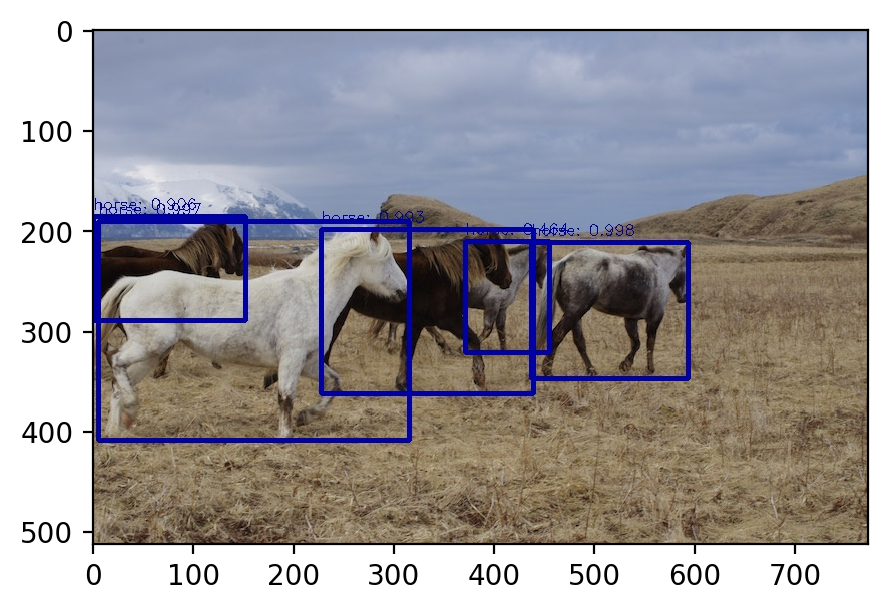

In [23]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5), dpi=200)
img = cv2.imread('imgs/herd_of_horses_m2det.jpg')
show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img)

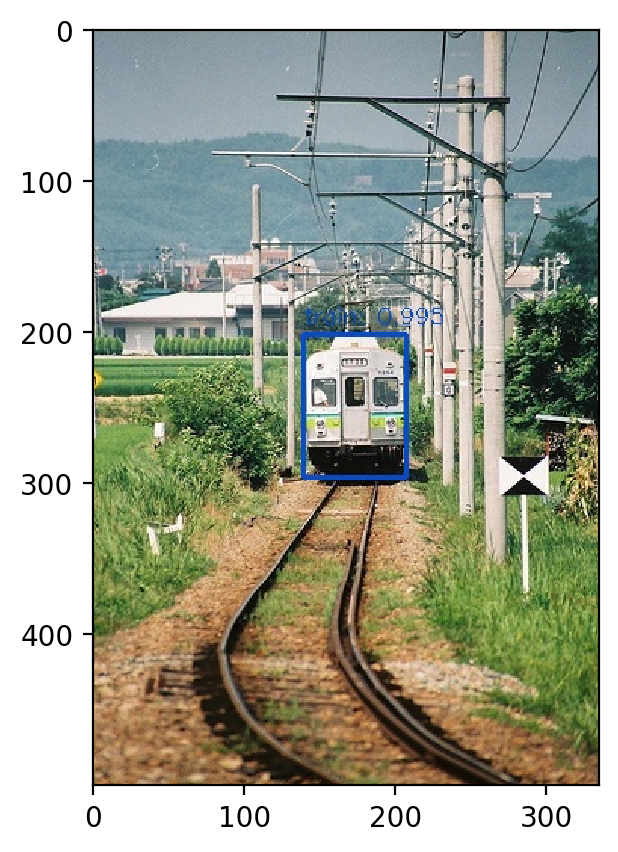

In [24]:
plt.figure(figsize=(5,5),dpi=200)
img=cv2.imread('imgs/train_m2det.jpg')
show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img)

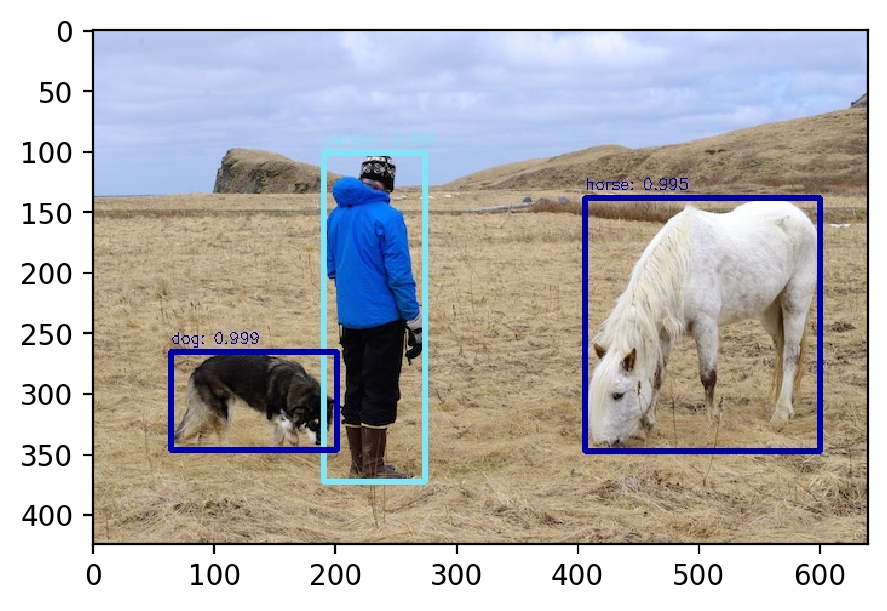

In [25]:
plt.figure(figsize=(5,5),dpi=200)
img=cv2.imread('imgs/person_m2det.jpg')
show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img)

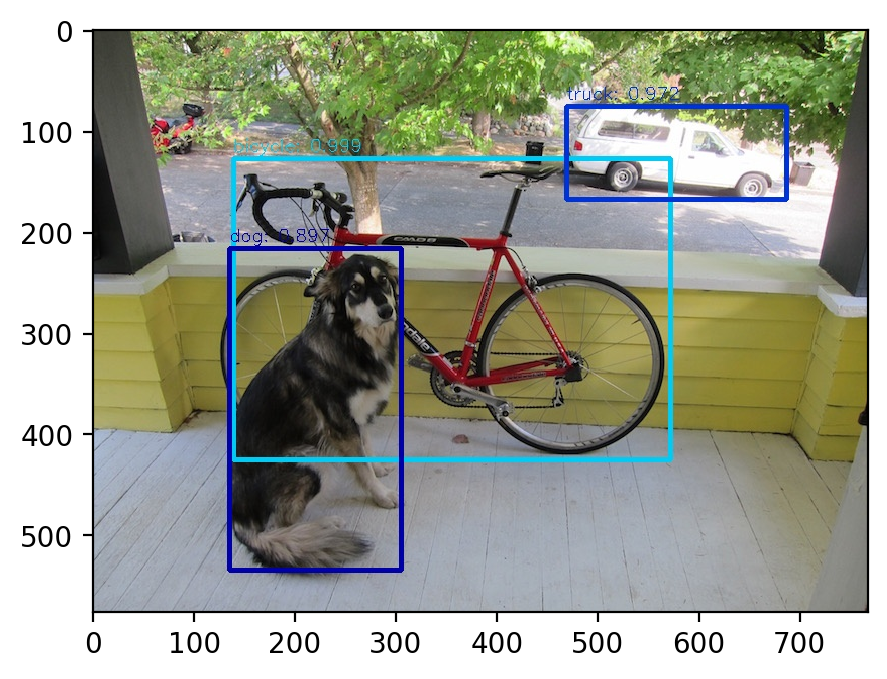

In [26]:
plt.figure(figsize=(5,5),dpi=200)
img=cv2.imread('imgs/dog_m2det.jpg')
show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img)